In [19]:
import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import random

## Veri setlerini yükleme

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Eğitim Veri setimize bakacak olursak :

In [3]:
print("x_train shape", x_train.shape)
print(f"Eğitim örnekleri    : {x_train.shape[0]:,.0f} Adet")

x_train shape (60000, 28, 28)
Eğitim örnekleri    : 60,000 Adet


### Test Veri Setimiz ise:

In [4]:
print("x_test shape", x_test.shape)
print(f"adet Test örnekleri : {x_test.shape[0]:,.0f} Adet")

x_test shape (10000, 28, 28)
adet Test örnekleri : 10,000 Adet


## Veri setine genel bakış

In [20]:
print(f"x_train shape : {x_train.shape} - y_train shape : {y_train.shape}")
print(f"x_test shape  : {x_test.shape} - y_test shape  : {y_test.shape}")

x_train shape : (60000, 28, 28, 1) - y_train shape : (60000,)
x_test shape  : (10000, 28, 28, 1) - y_test shape  : (10000,)


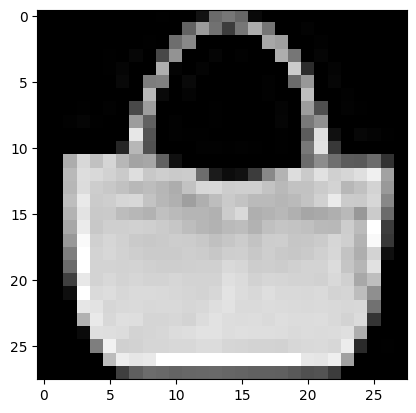

In [6]:
plt.imshow(x_train[100], cmap="gray")

In [8]:
batch_size = 100
num_classes = 10
epochs = 12 # 10 12 epoch önerilir.

img_rows, img_cols = 28, 28

if K.image_data_format() == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows,img_cols,1 )
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols, 1)
    input_shape = (img_rows,img_cols, 1)

In [9]:
x_train = x_train.astype("int")
x_test = x_test.astype("int")

In [10]:
print("input shape :", input_shape)
print("x_train shape :", x_train.shape)
print("x_test shape :", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

input shape : (28, 28, 1)
x_train shape : (60000, 28, 28, 1)
x_test shape : (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
#y_train = kr.utils.to_categorical(y_train, num_classes)
#y_test = kr.utils.to_categorical(y_test, num_classes)

In [12]:
model = Sequential()

# Conv2D katmanı: 32 filtre, 3x3 boyutunda kernel, ReLU aktivasyonu
model.add(Conv2D(32,(3,3), activation=kr.activations.relu, input_shape=input_shape))

# MaxPooling katmanı: 2x2 boyutunda ortaklama
model.add(MaxPooling2D((2, 2)))

# İkinci Conv2D katmanı: 64 filtre, 3x3 boyutunda kernel, ReLU aktivasyonu
model.add(Conv2D(32,(3,3), activation=kr.activations.relu))

# MaxPooling katmanı: 2x2 boyutunda ortaklama
model.add(MaxPooling2D((2, 2)))

# Üçüncü Conv2D katmanı: 64 filtre, 3x3 boyutunda kernel, ReLU aktivasyonu
model.add(Conv2D(32,(3,3), activation=kr.activations.relu))

# Flatten katmanı: 2D veriyi 1D vektöre dönüştürme
model.add(Flatten())

# Tam bağlantılı (Dense) katman: 128 nöron ve ReLU aktivasyonu
model.add(Dense(128, activation=kr.activations.relu))

# Çıkış katmanı: 10 sınıf için softmax aktivasyonu
model.add(Dense(10, activation='softmax'))

/home/dilaver/tf_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1738328623.696299   49383 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6634 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1
I0000 00:00:1738328623.698855   49383 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6634 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:02:00.0, compute capability: 6.1


In [13]:
model.compile(optimizer=kr.optimizers.Adam(), 
              loss=kr.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])

In [14]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               verbose=1,
                               mode='auto',
                               restore_best_weights=True,
                               start_from_epoch=3,
                               )

In [15]:
model.fit(x_train, y_train, 
          epochs=epochs, 
          batch_size=batch_size, 
          validation_data=(x_test,y_test), 
          callbacks=[early_stopping])

Epoch 1/12


I0000 00:00:1738328626.275410   49439 service.cc:148] XLA service 0x7fd4c8003780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738328626.275467   49439 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
I0000 00:00:1738328626.275474   49439 service.cc:156]   StreamExecutor device (1): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2025-01-31 16:03:46.304644: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738328626.455500   49439 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-31 16:03:46.761115: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[100,32,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,32,13,13]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_lab

 34/600 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2792 - loss: 10.7707

I0000 00:00:1738328628.010734   49439 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


588/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6859 - loss: 1.8454 

2025-01-31 16:03:51.005818: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[100,32,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,32,13,13]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-31 16:03:51.108496: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[100,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,32,5,5]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_

600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6879 - loss: 1.8224 - val_accuracy: 0.8228 - val_loss: 0.4926
Epoch 2/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8438 - loss: 0.4270 - val_accuracy: 0.8528 - val_loss: 0.4093
Epoch 3/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8714 - loss: 0.3526 - val_accuracy: 0.8659 - val_loss: 0.3695
Epoch 4/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8861 - loss: 0.3121 - val_accuracy: 0.8695 - val_loss: 0.3732
Epoch 5/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8944 - loss: 0.2895 - val_accuracy: 0.8788 - val_loss: 0.3450
Epoch 6/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9023 - loss: 0.2680 - val_accuracy: 0.8813 - val_loss: 0.3337
Epoch 7/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9053 - loss: 0.2545 - val_accuracy: 0.8709 - val_loss: 0.3721
Epoch 8/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9096 - loss: 0.2449 - val_accuracy: 0.8841 - val_

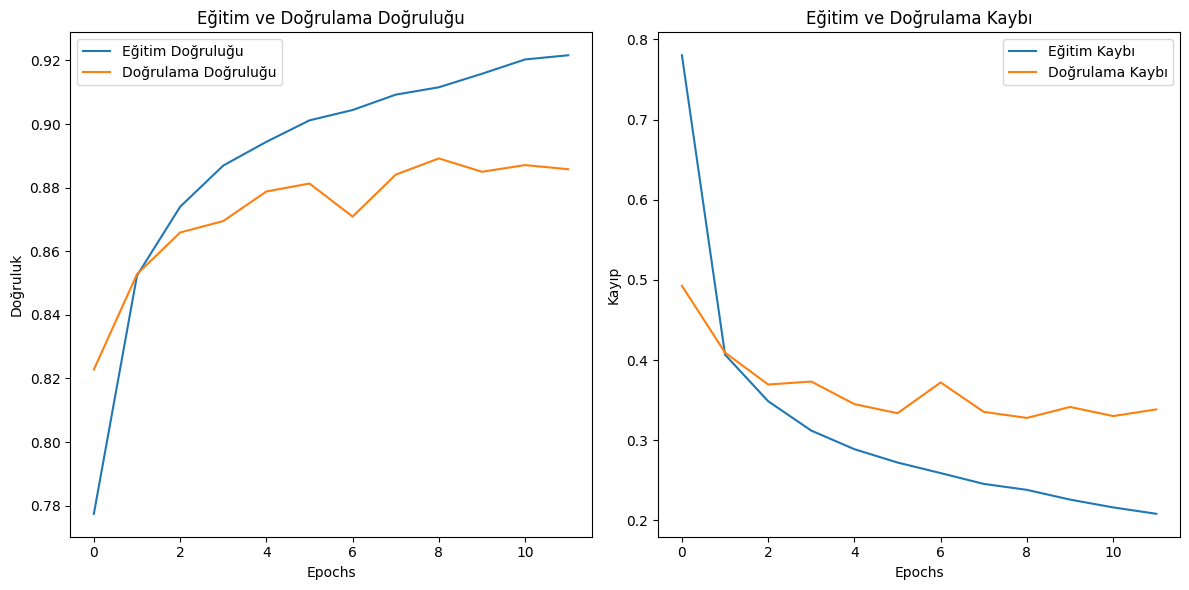

In [16]:
# Eğitim ve doğrulama doğruluğunu çizme
plt.figure(figsize=(12, 6))

# Eğitim doğruluğu
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(model.history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()

# Eğitim ve doğrulama kaybını çizme
plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'], label='Eğitim Kaybı')
plt.plot(model.history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
model.save("fashion_model.keras")